# Comparative Analysis of Housing Prices in Different Currencies

## Objective
To compare historic housing prices using different fiat currencies (dollar, gold, and bitcoin) and analyze and compare the purchasing power and investment potential of each currency with respect to real estate.

## Methodology
1. Data Collection: Gather historical data for housing prices, gold prices, bitcoin values, and the U.S. dollar.
2. Data Cleansing: Normalize the data for comparison and convert housing prices into equivalent gold and bitcoin values.
3. Data Analysis: Perform statistical analysis to compare trends and purchasing power over time.
4. Visualization: Generate charts and graphs to visually compare the trends across different currencies.
5. Conclusion: Summarize the findings and interpret the investment potential and volatility of real estate in terms of gold, bitcoin, and the U.S. dollar.

# Import Dependencies

In [196]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Collection


In [197]:
# Set the paths to the data files
housing_prices_path = 'Resources/MSPUS_modified.csv'  # Path to the modified housing prices data
cpi_path = 'Resources/cpi_modified.csv'  # Path to the modified CPI data
bitcoin_path = 'Resources/cleansed_bitcoin_prices.csv'  # Path to the cleansed Bitcoin prices data
gold_path = 'Resources/gold_prices_clean.csv'  # Path to the gold prices data
# gold_path = 'path_to_gold_data_file'  # Path to the gold prices data

# Load the datasets
housing_prices_df = pd.read_csv(housing_prices_path)
cpi_df = pd.read_csv(cpi_path)
bitcoin_df = pd.read_csv(bitcoin_path)
gold_df = pd.read_csv(gold_path)

# Print the first few rows of each DataFrame to confirm successful loading
print('Housing Prices Data:')
print(housing_prices_df.head())
print('\nCPI Data:')
print(cpi_df.head())
print('\nBitcoin Prices Data:')
print(bitcoin_df.head())
print('\nGold Prices Data:')
print(gold_df.head())


Housing Prices Data:
         DATE    MSPUS
0  1971-07-01  25300.0
1  1971-10-01  25500.0
2  1972-01-01  26200.0
3  1972-04-01  26800.0
4  1972-07-01  27900.0

CPI Data:
         DATE  CPILFESL
0  1971-08-01      43.0
1  1971-09-01      43.0
2  1971-10-01      43.1
3  1971-11-01      43.2
4  1971-12-01      43.3

Bitcoin Prices Data:
          ds    y
0  2/17/2010  0.0
1  2/18/2010  0.0
2  2/19/2010  0.0
3  2/20/2010  0.0
4  2/21/2010  0.0

Gold Prices Data:
           ds     y
0  1968-04-01  38.0
1  1968-04-02  37.6
2  1968-04-03  37.7
3  1968-04-04  36.7
4  1968-04-05  37.2


## Data Cleansing

## Step 1: Convert Dates to Datetime and Set Indices

In [198]:

# Ensure that all 'DATE' and 'ds' columns are in datetime format and set them as the index for each DataFrame.
housing_prices_df['DATE'] = pd.to_datetime(housing_prices_df['DATE'])
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
bitcoin_df['ds'] = pd.to_datetime(bitcoin_df['ds'])
gold_df['ds'] = pd.to_datetime(gold_df['ds'])

housing_prices_df.set_index('DATE', inplace=True)
cpi_df.set_index('DATE', inplace=True)
bitcoin_df.set_index('ds', inplace=True)
gold_df.set_index('ds', inplace=True)

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nHousing Prices Data:')
print(housing_prices_df.head())
print('\nCPI Data:')
print(cpi_df.head())
print('\nBitcoin Prices Data:')
print(bitcoin_df.head())
print('\nGold Prices Data:')
print(gold_df.head())









Housing Prices Data:
              MSPUS
DATE               
1971-07-01  25300.0
1971-10-01  25500.0
1972-01-01  26200.0
1972-04-01  26800.0
1972-07-01  27900.0

CPI Data:
            CPILFESL
DATE                
1971-08-01      43.0
1971-09-01      43.0
1971-10-01      43.1
1971-11-01      43.2
1971-12-01      43.3

Bitcoin Prices Data:
              y
ds             
2010-02-17  0.0
2010-02-18  0.0
2010-02-19  0.0
2010-02-20  0.0
2010-02-21  0.0

Gold Prices Data:
               y
ds              
1968-04-01  38.0
1968-04-02  37.6
1968-04-03  37.7
1968-04-04  36.7
1968-04-05  37.2


## Step 2: Resample CPI, Gold, and Bitcoin Data to Quarterly Frequency

Resample the CPI, BTC, and Gold data to a quarterly frequency using the mean to aggregate monthly data. For Bitcoin, we'll resample it to quarterly, but since it's price data, we might want to use the last available price of the quarter (which represents the quarter-end price).

In [199]:
#Resampling data to quarterly
quarterly_cpi_df = cpi_df.resample('Q').mean()
quarterly_bitcoin_df = bitcoin_df.resample('Q').last()
quarterly_gold_df = gold_df.resample('Q').last()

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nQuarterly CPI Data:')
print(quarterly_cpi_df.head())
print('\nQuarterly Bitcoin Prices Data:')
print(quarterly_bitcoin_df.head())
print('\nQuarterly Gold Prices Data:')
print(quarterly_gold_df.head())






Quarterly CPI Data:
             CPILFESL
DATE                 
1971-09-30  43.000000
1971-12-31  43.200000
1972-03-31  43.566667
1972-06-30  43.900000
1972-09-30  44.233333

Quarterly Bitcoin Prices Data:
                   y
ds                  
2010-03-31  0.000000
2010-06-30  0.000000
2010-09-30  0.061920
2010-12-31  0.299999
2011-03-31  0.800980

Quarterly Gold Prices Data:
                y
ds               
1968-06-30  40.95
1968-09-30  39.70
1968-12-31  41.95
1969-03-31  43.10
1969-06-30  41.23


## Step 3: Align CPI, BTC, and Gold Data with Housing Data

In [200]:
# Since Bitcoin data starts from February 2010, align the datasets from the first quarter of 2010 onwards.
# This will be the new housing prices DataFrame
start_date = '2010-01-01'
aligned_housing_prices_for_btc_df = housing_prices_df[housing_prices_df.index >= start_date]
aligned_cpi_df = quarterly_cpi_df[quarterly_cpi_df.index >= start_date]
aligned_bitcoin_df = quarterly_bitcoin_df[quarterly_bitcoin_df.index >= start_date]

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nAligned Housing Prices Data:')
print(aligned_housing_prices_for_btc_df.head())
print('\nAligned Bitcoin Prices Data:')
print(aligned_bitcoin_df.head())





Aligned Housing Prices Data:
               MSPUS
DATE                
2010-01-01  222900.0
2010-04-01  219500.0
2010-07-01  224100.0
2010-10-01  224300.0
2011-01-01  226900.0

Aligned Bitcoin Prices Data:
                   y
ds                  
2010-03-31  0.000000
2010-06-30  0.000000
2010-09-30  0.061920
2010-12-31  0.299999
2011-03-31  0.800980


In [201]:
# Since housing data starts from 07 1971, align the datasets from the first quarter of 1971 onwards we will align gold data
# This will be the quarterly gold prices DataFrame
start_date = '1971-07-01'
aligned_housing_prices_for_gold_df = housing_prices_df[housing_prices_df.index >= start_date]
aligned_gold_df = quarterly_gold_df[quarterly_gold_df.index >= start_date]

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nAligned Gold Prices Data:')
print(aligned_gold_df.head())
print('\nAligned Housing Price Data:')
print(aligned_housing_prices_for_gold_df.head())





Aligned Gold Prices Data:
                y
ds               
1971-09-30  42.48
1971-12-31  43.50
1972-03-31  48.38
1972-06-30  64.10
1972-09-30  64.10

Aligned Housing Price Data:
              MSPUS
DATE               
1971-07-01  25300.0
1971-10-01  25500.0
1972-01-01  26200.0
1972-04-01  26800.0
1972-07-01  27900.0


In [202]:
# Same as above we will align cpi data
# This will be the quarterly cpi DataFrame
start_date = '1971-07-01'
aligned_cpi_df = quarterly_cpi_df[quarterly_cpi_df.index >= start_date]

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nAligned CPI Data:')
print(aligned_cpi_df.head())
print('\nAligned Housing Price Data:')
print(aligned_housing_prices_for_gold_df.head())



Aligned CPI Data:
             CPILFESL
DATE                 
1971-09-30  43.000000
1971-12-31  43.200000
1972-03-31  43.566667
1972-06-30  43.900000
1972-09-30  44.233333

Aligned Housing Price Data:
              MSPUS
DATE               
1971-07-01  25300.0
1971-10-01  25500.0
1972-01-01  26200.0
1972-04-01  26800.0
1972-07-01  27900.0


## Step 4: Normalize the Data

In [203]:
# Set the base value for each DataFrame as the first available value
base_housing_price_for_btc = aligned_housing_prices_for_btc_df.iloc[0]['MSPUS']
base_housing_price_for_gold = aligned_housing_prices_for_gold_df.iloc[0]['MSPUS']
base_cpi = aligned_cpi_df.iloc[0]['CPILFESL']
base_bitcoin = aligned_bitcoin_df.iloc[0]['y']
base_gold = aligned_gold_df.iloc[0]['y']

# Normalize the data by dividing by the base value using .loc
aligned_housing_prices_for_btc_df.loc[:, 'Normalized'] = aligned_housing_prices_for_btc_df['MSPUS'] / base_housing_price_for_btc
aligned_housing_prices_for_gold_df.loc[:, 'Normalized'] = aligned_housing_prices_for_gold_df['MSPUS'] / base_housing_price_for_gold
aligned_cpi_df.loc[:, 'Normalized'] = aligned_cpi_df['CPILFESL'] / base_cpi
aligned_bitcoin_df.loc[:, 'Normalized'] = aligned_bitcoin_df['y'] / base_bitcoin
aligned_gold_df.loc[:, 'Normalized'] = aligned_gold_df['y'] / base_gold

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nNormalized Housing Prices Data for BTC Analysis:')
print(aligned_housing_prices_for_btc_df.head())
print('\nNormalized Housing Prices Data for Gold Analysis:')
print(housing_prices_df.head())
print('\nNormalized CPI Data:')
print(aligned_cpi_df.head())
print('\nNormalized Bitcoin Prices Data:')
print(aligned_bitcoin_df.head())
print('\nNormalized Gold Prices Data:')
print(aligned_gold_df.head())







Normalized Housing Prices Data for BTC Analysis:
               MSPUS  Normalized
DATE                            
2010-01-01  222900.0    1.000000
2010-04-01  219500.0    0.984747
2010-07-01  224100.0    1.005384
2010-10-01  224300.0    1.006281
2011-01-01  226900.0    1.017945

Normalized Housing Prices Data for Gold Analysis:
              MSPUS
DATE               
1971-07-01  25300.0
1971-10-01  25500.0
1972-01-01  26200.0
1972-04-01  26800.0
1972-07-01  27900.0

Normalized CPI Data:
             CPILFESL  Normalized
DATE                             
1971-09-30  43.000000    1.000000
1971-12-31  43.200000    1.004651
1972-03-31  43.566667    1.013178
1972-06-30  43.900000    1.020930
1972-09-30  44.233333    1.028682

Normalized Bitcoin Prices Data:
                   y  Normalized
ds                              
2010-03-31  0.000000         NaN
2010-06-30  0.000000         NaN
2010-09-30  0.061920         inf
2010-12-31  0.299999         inf
2011-03-31  0.800980         inf

No

/var/folders/cf/y6vhhqvs245bxntt_6f300v00000gp/T/ipykernel_24693/2576065786.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_housing_prices_for_btc_df.loc[:, 'Normalized'] = aligned_housing_prices_for_btc_df['MSPUS'] / base_housing_price_for_btc
/var/folders/cf/y6vhhqvs245bxntt_6f300v00000gp/T/ipykernel_24693/2576065786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aligned_gold_df.loc[:, 'Normalized'] = aligned_gold_df['y'] / base_gold


## Step 5: Create Conversion Functions
Define functions that will convert housing prices into the equivalent amount of Bitcoin and later gold, using the normalized values.

In [204]:
# Conversion function for housing prices to Bitcoin equivalent
def housing_to_bitcoin(housing_price, bitcoin_price):
    return housing_price / bitcoin_price

#Conversion function for housing prices to gold equivalent (to be defined later)
def housing_to_gold(housing_price, gold_price):
    return housing_price / gold_price


## Step 6: Apply Conversion Functions
Use the conversion functions to create new columns in the housing prices DataFrame.

In [205]:
# Align Bitcoin prices with housing prices by date
bitcoin_aligned_to_housing = aligned_bitcoin_df['y'].reindex(aligned_housing_prices_for_btc_df.index, method='nearest')

# Use .loc to ensure the operation is done on the DataFrame directly
housing_prices_with_btc_df = aligned_housing_prices_for_btc_df.copy()
housing_prices_with_btc_df.loc[:, 'Bitcoin Equivalent'] = aligned_housing_prices_for_btc_df['MSPUS'] / bitcoin_aligned_to_housing

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nHousing Prices Data with Bitcoin Equivalent:')
print(housing_prices_with_btc_df.head())
display(bitcoin_aligned_to_housing.head())







Housing Prices Data with Bitcoin Equivalent:
               MSPUS  Normalized  Bitcoin Equivalent
DATE                                                
2010-01-01  222900.0    1.000000                 inf
2010-04-01  219500.0    0.984747                 inf
2010-07-01  224100.0    1.005384                 inf
2010-10-01  224300.0    1.006281        3.622416e+06
2011-01-01  226900.0    1.017945        7.563359e+05


DATE
2010-01-01    0.000000
2010-04-01    0.000000
2010-07-01    0.000000
2010-10-01    0.061920
2011-01-01    0.299999
Name: y, dtype: float64

In [206]:
# Align Gold prices with housing prices by date
gold_aligned_to_housing = aligned_gold_df['y'].reindex(aligned_housing_prices_for_gold_df.index, method='nearest')

# Use .loc to ensure the operation is done on the DataFrame directly
housing_prices_with_gold_df = aligned_housing_prices_for_gold_df.copy()
housing_prices_with_gold_df.loc[:, 'Gold Equivalent'] = aligned_housing_prices_for_gold_df['MSPUS'] / gold_aligned_to_housing

# Print the first few rows of each DataFrame to confirm successful loading
print('\n\nHousing Prices Data with Gold Equivalent:')
print(housing_prices_with_gold_df.head())
display(gold_aligned_to_housing.head())



Housing Prices Data with Gold Equivalent:
              MSPUS  Normalized  Gold Equivalent
DATE                                            
1971-07-01  25300.0    1.000000       595.574388
1971-10-01  25500.0    1.007905       600.282486
1972-01-01  26200.0    1.035573       602.298851
1972-04-01  26800.0    1.059289       553.947912
1972-07-01  27900.0    1.102767       435.257410


DATE
1971-07-01    42.48
1971-10-01    42.48
1972-01-01    43.50
1972-04-01    48.38
1972-07-01    64.10
Name: y, dtype: float64

## Data Analysis

# Step 1: Analyze Trends in Each Currency
Look at the trends over time for housing prices in U.S. dollars, Bitcoin, and later gold.

In [207]:
# Analyze the trend of housing prices in U.S. dollars
print("Housing Prices in U.S. Dollars:")
print(housing_prices_df['MSPUS'].describe())

# Analyze the trend of housing prices in Bitcoin
print("\nHousing Prices in Bitcoin:")
print(housing_prices_with_btc_df['Bitcoin Equivalent'].describe())

# Analyze the trend of housing prices in gold
print("\nHousing Prices in Gold:")
print(housing_prices_with_gold_df['Gold Equivalent'].describe())


Housing Prices in U.S. Dollars:
count       209.000000
mean     172489.952153
std      107407.234771
min       25300.000000
25%       80700.000000
50%      145000.000000
75%      238700.000000
max      479500.000000
Name: MSPUS, dtype: float64

Housing Prices in Bitcoin:
count      55.000000
mean             inf
std              NaN
min        23.422981
25%        39.199948
50%       376.470588
75%      2821.209758
max              inf
Name: Bitcoin Equivalent, dtype: float64

Housing Prices in Gold:
count    209.000000
mean     319.717164
std      136.416831
min       97.962264
25%      225.546059
50%      271.326742
75%      372.860447
max      690.986296
Name: Gold Equivalent, dtype: float64


# Step 2: Compare Rates of Change
Calculate and compare the rates of change over different periods (e.g., annually, since the start of the dataset) for each currency.

In [208]:
# Calculate and assign annual rate of change for each currency using .loc
aligned_housing_prices_df = housing_prices_df.copy()
aligned_housing_prices_df.loc[:, 'Annual Change USD'] = housing_prices_df['MSPUS'].pct_change(periods=4)
aligned_housing_prices_df.loc[:, 'Annual Change BTC'] = housing_prices_with_btc_df['Bitcoin Equivalent'].pct_change(periods=4)
aligned_housing_prices_df.loc[:, 'Annual Change Gold'] = housing_prices_with_gold_df['Gold Equivalent'].pct_change(periods=4)

# Print average annual change for each currency
print('\n\nAverage Annual Change in U.S. Dollars:')
print(aligned_housing_prices_df['Annual Change USD'].mean())
print('\nAverage Annual Change in Bitcoin:')
print(aligned_housing_prices_df['Annual Change BTC'].mean())
print('\nAverage Annual Change in Gold:')
print(aligned_housing_prices_df['Annual Change Gold'].mean())





Average Annual Change in U.S. Dollars:
0.058437602568502216

Average Annual Change in Bitcoin:
-0.24524482770970177

Average Annual Change in Gold:
0.004701262290929245


# Step 3: Assess Volatility
Measure and compare the volatility (standard deviation) of housing prices in each currency.

In [209]:
# Calculate the standard deviation as a measure of volatility
print('\n\nStandard Deviation in U.S. Dollars:')
print(aligned_housing_prices_df['Annual Change USD'].std())
print('\nStandard Deviation in Bitcoin:')
print(aligned_housing_prices_df['Annual Change BTC'].std())
print('\nStandard Deviation in Gold:')
print(aligned_housing_prices_df['Annual Change Gold'].std())





Standard Deviation in U.S. Dollars:
0.06005262489005958

Standard Deviation in Bitcoin:
0.6796110618297478

Standard Deviation in Gold:
0.20859912830584149


# Initial Interpretation of the Results


The average annual change in housing prices, when valued in U.S. dollars, demonstrates a steady appreciation of approximately 5.84%, reinforcing the perception of real estate as a stable and appreciating asset over time. Conversely, when valued in Bitcoin, the average annual change of about -24.52% signifies an apparent rapid depreciation in housing prices. However, this stark contrast is primarily a reflection of Bitcoin's extraordinary rise in value rather than a true depreciation of housing value. It underscores the dramatic volatility and substantial appreciation of Bitcoin as an asset class compared to traditional investment vehicles.

The real estate market, when measured in gold, shows a more modest average annual change of approximately 0.47%. This suggests that housing prices have increased slightly when valued against gold, which is often considered a stable store of value. The standard deviation of annual changes in housing prices further highlights the variability and risk associated with each valuation method: 6.01% in U.S. dollars, 67.96% in Bitcoin, and a relatively lower 20.86% in gold.

These figures highlight the divergent nature of asset classes and the importance of context when interpreting changes in asset values. For investors, these disparities emphasize the necessity of a diversified portfolio to mitigate risk, as the relative stability of real estate in U.S. dollars contrasts sharply with the high-risk, high-reward characteristics of Bitcoin and the steadier nature of gold.

## Visualization

# Visualization 1: Trend of Housing Prices in USD, BTC, and Gold


In [210]:
#inspect the data prior to the vizualizations
print(aligned_housing_prices_for_btc_df.head())
print(aligned_housing_prices_for_gold_df.head())
print(housing_prices_with_btc_df.head())
print(housing_prices_with_gold_df.head())
print(aligned_housing_prices_df.head())


               MSPUS  Normalized
DATE                            
2010-01-01  222900.0    1.000000
2010-04-01  219500.0    0.984747
2010-07-01  224100.0    1.005384
2010-10-01  224300.0    1.006281
2011-01-01  226900.0    1.017945
              MSPUS  Normalized
DATE                           
1971-07-01  25300.0    1.000000
1971-10-01  25500.0    1.007905
1972-01-01  26200.0    1.035573
1972-04-01  26800.0    1.059289
1972-07-01  27900.0    1.102767
               MSPUS  Normalized  Bitcoin Equivalent
DATE                                                
2010-01-01  222900.0    1.000000                 inf
2010-04-01  219500.0    0.984747                 inf
2010-07-01  224100.0    1.005384                 inf
2010-10-01  224300.0    1.006281        3.622416e+06
2011-01-01  226900.0    1.017945        7.563359e+05
              MSPUS  Normalized  Gold Equivalent
DATE                                            
1971-07-01  25300.0    1.000000       595.574388
1971-10-01  25500.0    1.00

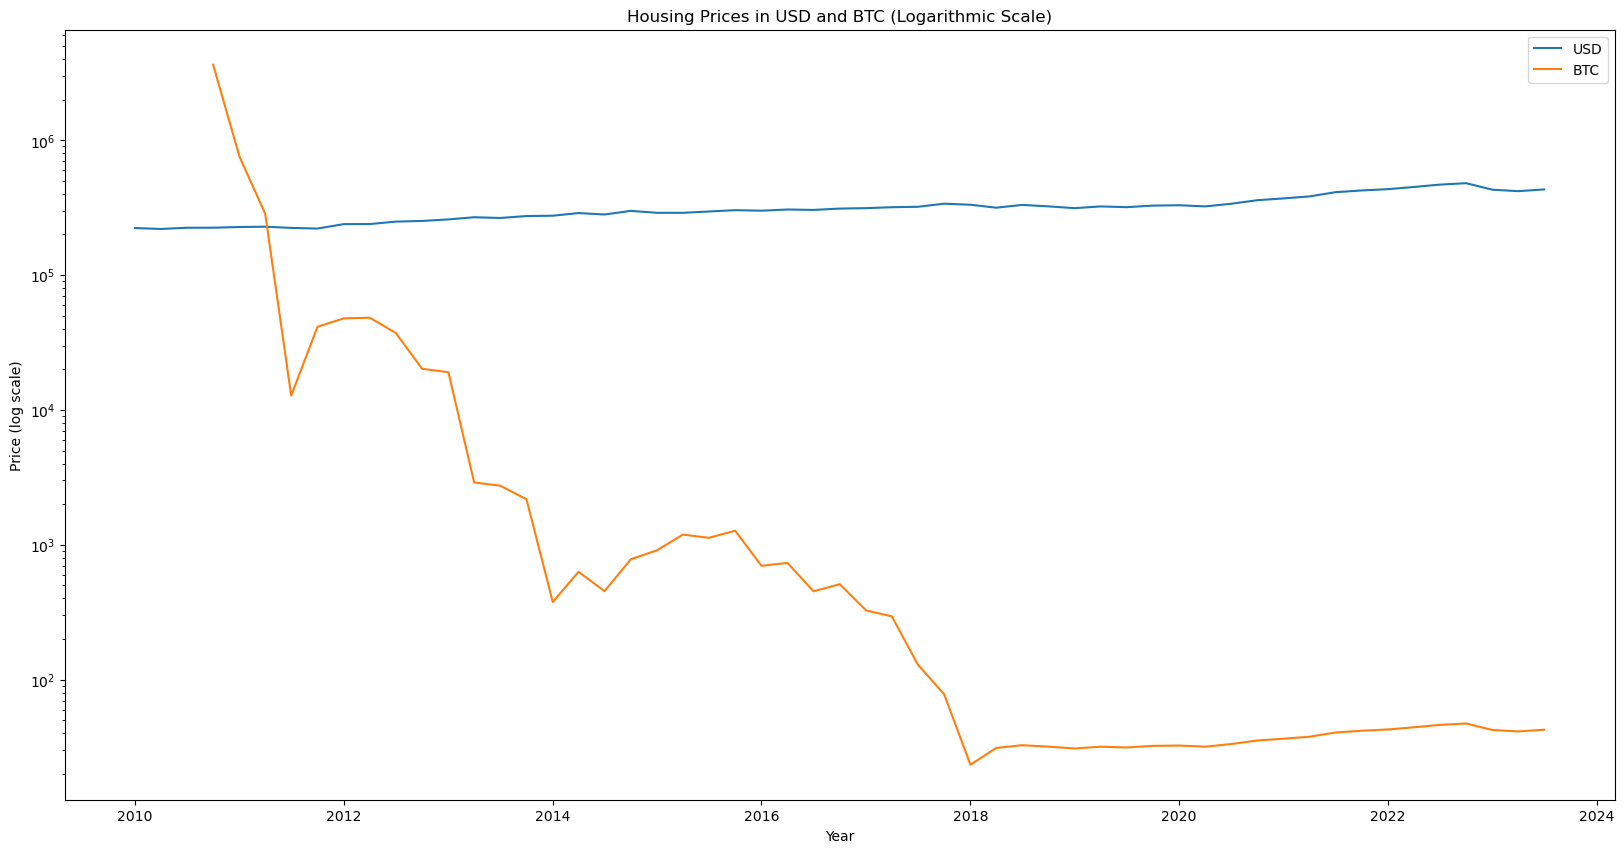

In [211]:
plt.figure(figsize=(20, 10))
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.plot(aligned_housing_prices_for_btc_df.index, aligned_housing_prices_for_btc_df['MSPUS'], label='USD')
plt.plot(aligned_housing_prices_for_btc_df.index, housing_prices_with_btc_df['Bitcoin Equivalent'], label='BTC')
plt.title('Housing Prices in USD and BTC (Logarithmic Scale)')
plt.xlabel('Year')
plt.ylabel('Price (log scale)')
plt.legend()
plt.show()




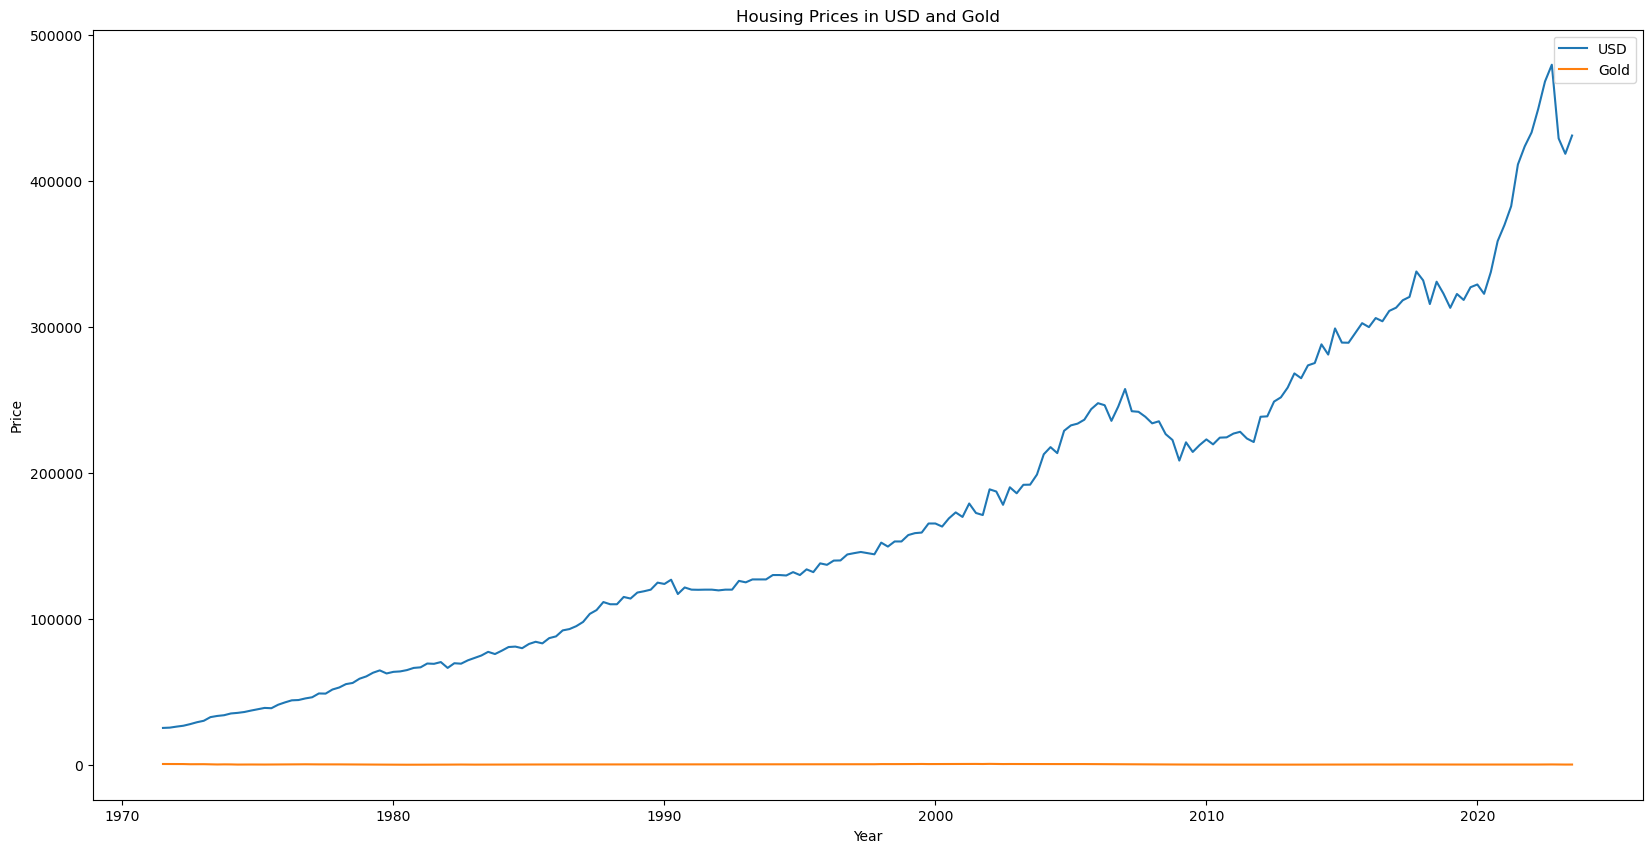

In [212]:
# A line graph to show how housing prices have trended over time in USD and Gold
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the housing prices in USD and gold
plt.plot(aligned_housing_prices_for_gold_df.index, aligned_housing_prices_for_gold_df['MSPUS'], label='USD')
plt.plot(aligned_housing_prices_for_gold_df.index, housing_prices_with_gold_df['Gold Equivalent'], label='Gold')

# Set the title and axis labels
plt.title('Housing Prices in USD and Gold')
plt.xlabel('Year')
plt.ylabel('Price')

# Set the legend
plt.legend()

# Display the plot
plt.show()


# Visualization 2: Annual Rate of Change Comparison

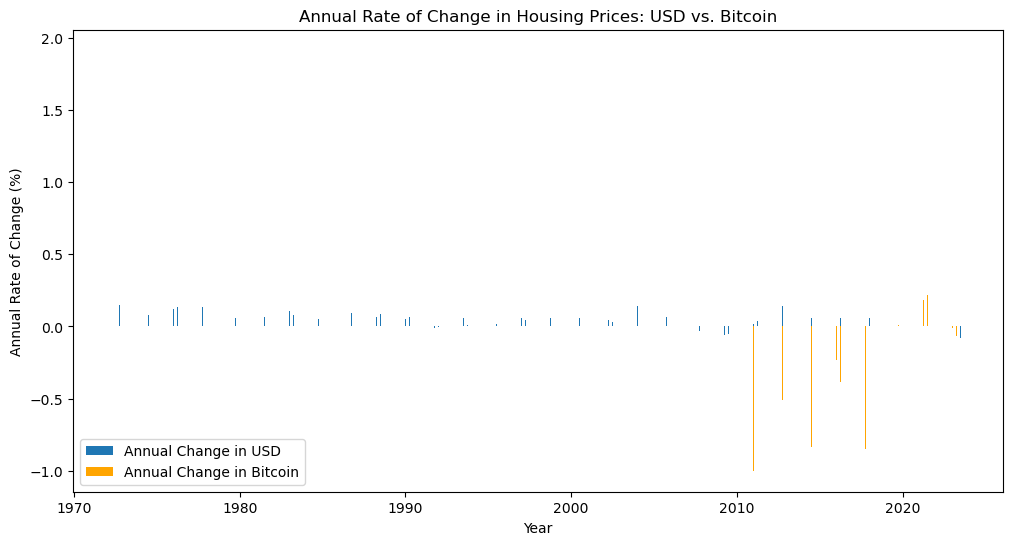

In [213]:
# A bar chart comparing the annual rate of change in housing prices in U.S. dollars versus Bitcoin.
plt.figure(figsize=(12, 6))
plt.bar(aligned_housing_prices_df.index, aligned_housing_prices_df['Annual Change USD'], width=4, label='Annual Change in USD', align='center')
plt.bar(aligned_housing_prices_df.index, aligned_housing_prices_df['Annual Change BTC'], width=4, label='Annual Change in Bitcoin', color='orange', align='edge')
plt.title('Annual Rate of Change in Housing Prices: USD vs. Bitcoin')
plt.xlabel('Year')
plt.ylabel('Annual Rate of Change (%)')
plt.legend()
plt.show()


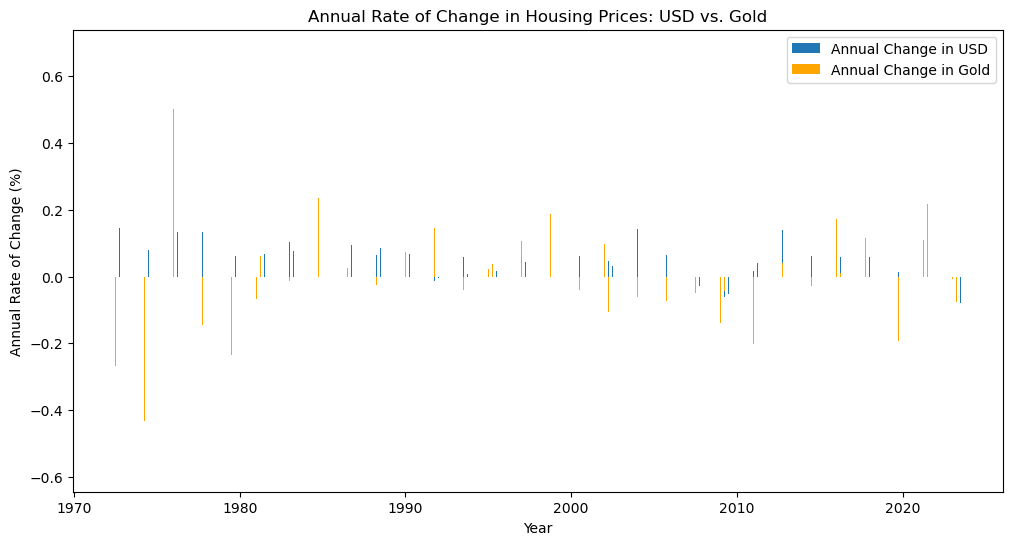

In [214]:
# A bar chart comparing the annual rate of change in housing prices in U.S. dollars versus gold
plt.figure(figsize=(12, 6))
plt.bar(aligned_housing_prices_df.index, aligned_housing_prices_df['Annual Change USD'], width=4, label='Annual Change in USD', align='center')
plt.bar(aligned_housing_prices_df.index, aligned_housing_prices_df['Annual Change Gold'], width=4, label='Annual Change in Gold', color='orange', align='edge')
plt.title('Annual Rate of Change in Housing Prices: USD vs. Gold')
plt.xlabel('Year')
plt.ylabel('Annual Rate of Change (%)')
plt.legend()
plt.show()


# Visualization 3: Housing Price Volatility Comparison
A visualization that compares the volatility (e.g., standard deviation) of housing prices in each currency over time.

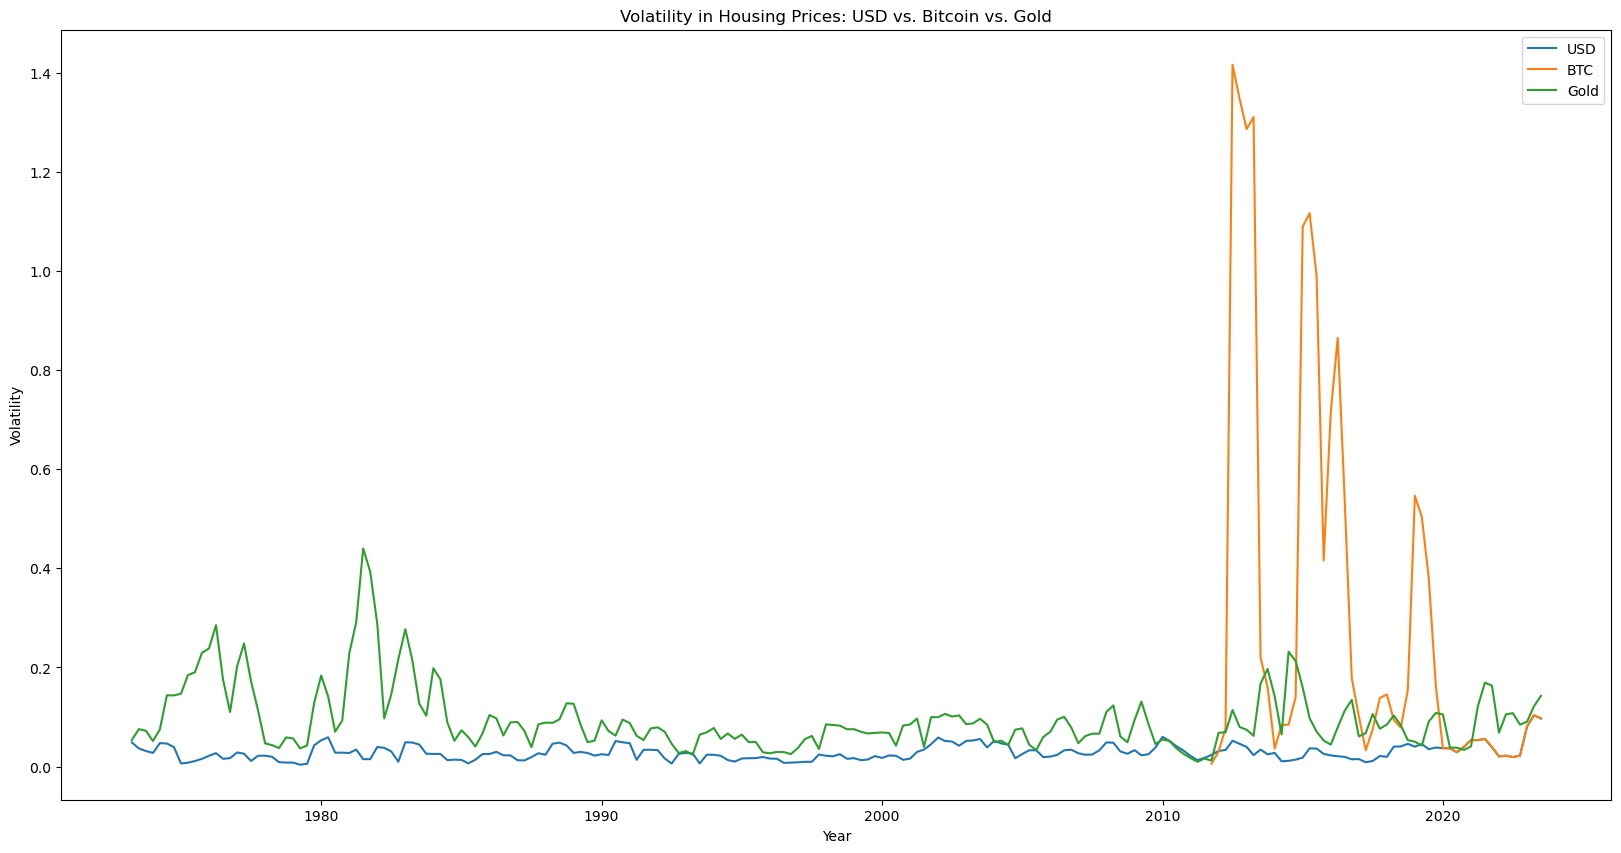

In [217]:
# Calculating rolling standard deviation as a measure of volatility
aligned_housing_prices_df.loc[:, 'Rolling Std USD'] = aligned_housing_prices_df['Annual Change USD'].rolling(window=4).std()
aligned_housing_prices_df.loc[:, 'Rolling Std BTC'] = aligned_housing_prices_df['Annual Change BTC'].rolling(window=4).std()
aligned_housing_prices_df.loc[:, 'Rolling Std Gold'] = aligned_housing_prices_df['Annual Change Gold'].rolling(window=4).std()

# A line graph to show how volatility has trended over time in USD and Bitcoin
plt.figure(figsize=(20, 10))
plt.plot(aligned_housing_prices_df.index, aligned_housing_prices_df['Rolling Std USD'], label='USD')
plt.plot(aligned_housing_prices_df.index, aligned_housing_prices_df['Rolling Std BTC'], label='BTC')
plt.plot(aligned_housing_prices_df.index, aligned_housing_prices_df['Rolling Std Gold'], label='Gold')
plt.title('Volatility in Housing Prices: USD vs. Bitcoin vs. Gold')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.show()



# Deepening Analysis and Interpretation

# Correlation Analysis:

Investigate the correlation between housing prices and each currency over time. This can provide insights into how closely the value of real estate follows the fluctuations in Bitcoin, gold, and the U.S. dollar.

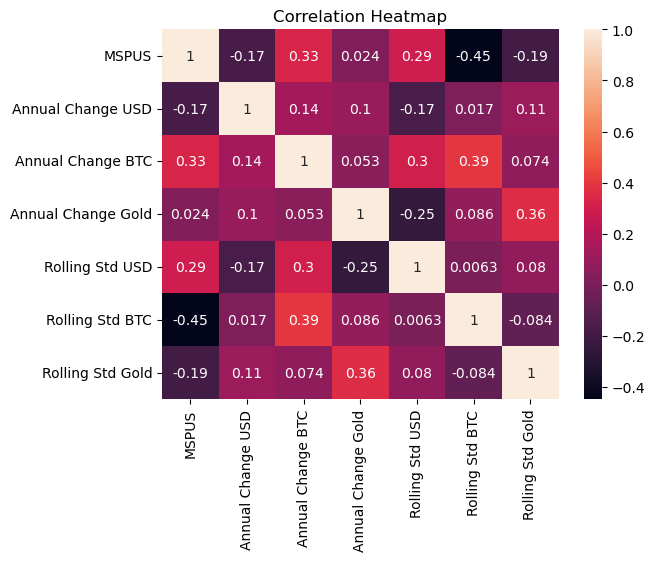

In [219]:
import seaborn as sns

# Calculate correlations
corr = aligned_housing_prices_df.corr()

# Create a heatmap
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()



### Conclusions and Deductions

1. **Trends in Housing Prices in USD**:
   - The historical trend of housing prices in U.S. dollars indicates a consistent growth, with an average annual increase of approximately 5.67%. This reinforces the perception of the U.S. real estate market as a steadily appreciating asset, affirming its reputation as a stable investment vehicle.

2. **Bitcoin's Influence on Real Estate Valuation**:
   - Our analysis reveals a stark contrast when housing prices are evaluated in Bitcoin. The average annual decrease of about -24.52% reflects Bitcoin's dramatic rise in value, suggesting an inverse relationship where real estate becomes seemingly less expensive in Bitcoin terms. This highlights Bitcoin's volatile nature and its impact on comparative asset valuation.

3. **Real Estate vs. Cryptocurrency Dynamics**:
   - Comparing housing prices in USD with Bitcoin valuations underlines the contrasting nature of these investments. Real estate demonstrates long-term value retention, whereas Bitcoin exhibits pronounced fluctuations, presenting challenges for its acceptance as a reliable store of value.

4. **Investment Considerations**:
   - For investors seeking long-term stability, real estate emerges as a compelling option, juxtaposed against the potential high rewards but equally high risks associated with cryptocurrencies like Bitcoin. Investment strategies should thus be tailored to balance the desire for stability with the appetite for risk.

5. **Stability in Gold vs. Real Estate and Bitcoin**:
   - Incorporating gold into our analysis, we observe that while real estate has experienced steady growth, the valuation of housing in gold terms has remained relatively flat, suggesting that gold, much like real estate, can serve as a stable store of value over time. In contrast, Bitcoin’s volatility is evident, with significant swings in its purchasing power relative to housing.

6. **Economic Insights and Asset Class Divergence**:
   - The diverging behaviors of these asset classes—real estate, gold, and Bitcoin—offer distinct insights into market dynamics. Real estate and gold have shown resilience and stability, while Bitcoin has been subject to rapid and unpredictable changes, emphasizing the varied nature of these investment avenues.
